# Mini Project 1: EDA - Data Exploration and Visualisation

## Objective
The objective of this assignment is to enable you to build and train skills in business data exploration and
visualization by applying methods from statistics.
You will be exploring the domain of wine quality - a complex category that depends on multiple numeric
and non-numeric parameters, such as content of alcohol and sugar, flavor, geographical origin, and human
taste. The goal is to reveal insights explaining these dependencies. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
red = pd.read_excel("winequality-red.xlsx",  skiprows=1)
white = pd.read_excel("winequality-white.xlsx",  skiprows=1)

In [3]:
red.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [4]:
white.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [5]:
red.shape
red.info()

<class 'pandas.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
white.shape
white.info()

<class 'pandas.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


##### 1. Describe (descriptive statistics)

In [7]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [8]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


##### 2. Check for missing values

In [9]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

##### 3. Check duplicates

In [11]:
red.duplicated().sum()

np.int64(240)

In [12]:
white.duplicated().sum()

np.int64(937)

#### Data Overview
The red wine dataset contains 1599 observations and 12 attributes.
All variables are numeric.
No missing values were detected.
Some attributes appear to have different ranges (e.g., alcohol vs sulphates), which may later require scaling.

# Expectations and Hypotheses

### Expectations Based on the Dataset

The dataset contains chemical properties of red and white wines, such as alcohol content, residual sugar, pH value, acidity levels, etc., as well as a quality rating.
Based on these variables, we can expect measurable differences between red and white wine.

#### Among other things, we expect:

* That white wine has, on average, a higher residual sugar content than red wine
* That red wine has higher levels of certain acids (e.g., volatile acidity)
* That alcohol content has a positive relationship with quality
* That some chemical properties have a greater impact on quality than others


# Hypotheses

## Research Hypotheses

To structure the analysis, the hypotheses are divided into two categories:
- (1) Group comparison hypotheses  
- (2) Relationship and quality hypotheses.

### A. Group Comparison Hypotheses

These hypotheses examine structural differences between red and white wine and are tested using descriptive statistics and independent sample t-tests.

- H1: White wine has a higher mean residual sugar than red wine.
- H2: The mean alcohol content differs between red and white wine.
- H3: The mean volatile acidity of red wine is higher than that of white wine.


### B. Relationship and Quality Hypotheses

These hypotheses examine relationships between chemical properties and wine quality and are evaluated using correlation analysis and feature selection techniques.

- H4: There is a positive relationship between alcohol content and wine quality.
- H5: Higher residual sugar does not necessarily result in higher wine quality.
- H6: Some chemical properties have a stronger influence on wine quality than others.

# Recipients of the Analysis
The analysis may be relevant for several stakeholders in the wine industry.

### Wine Producers

#### Wine producers can use the analysis to:

* Identify which chemical factors have the greatest impact on quality
* Optimize the production process (e.g., adjust fermentation to influence alcohol content)
* Understand how to improve quality without unnecessarily increasing costs
* Develop different wine profiles (dry, sweet, etc.)

A data-driven understanding of quality can strengthen product development.

### Wine Distributors

#### Wine distributors can use the analysis to:

* Compare quality between red and white wines
* Support pricing strategies and marketing efforts
* Segment wines into different quality and price categories
* Optimize inventory management

If one type of wine generally scores higher, this may influence the sales strategy.

### Consumers

#### Consumers can gain insight into:

* Whether higher alcohol content is associated with higher quality
* Whether sweeter wine necessarily means better quality
* Which chemical characteristics typically define higher quality

This can help them make more informed purchasing decisions.


# Data Cleaning and Transformation

#### Step 1: Remove duplicates

In [13]:
red = red.drop_duplicates()
white = white.drop_duplicates()

print(red.shape)
print(white.shape)

(1359, 12)
(3961, 12)


Duplicate observations were removed to avoid bias and repeated measurements in the analysis.

#### Step 2 – Rename columns (Transformation)

In [14]:
red.columns = red.columns.str.replace(" ", "_")
white.columns = white.columns.str.replace(" ", "_")

Column names were reformatted for easier manipulation and analysis.

#### Step 3 – Create the “type” Column

In [15]:
red['type'] = "red"
white['type'] = "white"

#### Step 4 – Aggregation

In [16]:
wine = pd.concat([red, white], ignore_index=True)

wine.shape
wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red


In [17]:
wine["type"].value_counts()
wine.groupby("type")["quality"].mean()

type
red      5.623252
white    5.854835
Name: quality, dtype: float64

In [18]:
wine.to_csv("wine-cleaned.xlsx", index=False)

The two datasets were aggregated into one combined dataset while preserving the wine type.

#### Step 5 – Feature Engineering

Quality level kategori

In [19]:
wine["quality_level"] = pd.cut(
    wine["quality"],
    bins=[2,4,6,9],
    labels=["low","medium","high"]
)

wine.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type,quality_level
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,medium


The quality variable was discretized into three levels — low (3–4), medium (5–6), and high (7–9) — in order to enable segmentation and a more structured comparative analysis.

#### Step 6 – Dependent & Independent Variables

#### Dependent variable:
- Qulatiy

#### Independent variables:
- fixed_acidity
- volatile_acidity
- citric_acid
- residual_sugar
- chlorides
- free_sulfur_dioxide
- total_sulfur_dioxide
- density
- pH
- sulphates
- alcohol

### External dataset

##### STEP 1 – read dataset

In [20]:
reviews = pd.read_csv("winemag-data-130k-v2.csv")
reviews.shape
reviews.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


##### STEP 2 – keep only relevant columns

In [21]:
reviews = reviews[["country", "price", "points", "variety", "description"]]

##### Why these?
- points → external quality score
- price → market value
- country → geographical factor
- variety → grape variety

##### STEP 3 – save locally

In [22]:
reviews.to_csv("external_wine_reviews.csv", index=False)

An external wine review dataset from Kaggle was imported and stored locally.
The dataset includes consumer ratings (points), price, country, and grape variety.
This external data may support future market-based analysis and comparison with the physicochemical wine quality scores.

In [23]:
reviews.isnull().sum()

country          63
price          8996
points            0
variety           1
description       0
dtype: int64

The external wine reviews dataset contains missing values, particularly in the price attribute (8996 missing values). Since this dataset is currently only stored for potential future market-based analysis and not directly used in the present statistical modelling, no further cleaning was applied at this stage.

# Data Exploration and Analysis

## 7. Analyze your data by exploration of the statistical measures of the samples

#### 7.1 Descriptive Statistics

To explore the datasets, descriptive statistics were calculated using the describe() function for red wine, white wine, and the aggregated dataset

In [24]:
red.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Red Wine (n = 1359)
The red wine dataset contains 1359 samples.

Key statistics:
- Mean alcohol level: 10.43
- Mean residual sugar: 2.52
- Mean pH: 3.31
- Mean density: 0.9967
- Standard deviation of alcohol: 1.08
- Alcohol range: 8.4 – 14.9

The majority of alcohol values are concentrated between 9.5 and 11.1 (25th–75th percentile). Red wine shows relatively low residual sugar compared to white wine.

In [25]:
white.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### White Wine (n = 3961)
The white wine dataset contains 3961 samples.

Key statistics:
- Mean alcohol level: 10.59
- Mean residual sugar: 5.91
- Mean pH: 3.20
- Mean density: 0.9938
- Standard deviation of alcohol: 1.21
- Maximum residual sugar: 65.8

White wine clearly has a significantly higher level of residual sugar compared to red wine. The pH is slightly lower, indicating higher acidity. The large difference between median residual sugar (4.7) and maximum value (65.8) indicates a strongly right-skewed distribution.

In [26]:
wine.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Aggregated Dataset (n = 5320)
The combined dataset contains 5320 samples.

Key statistics:
- Mean alcohol: 10.55
- Mean residual sugar: 5.05
- Mean pH: 3.22

The aggregated dataset naturally reflects the structural differences between red and white wine.

| Feature               | Red Wine | White Wine | Observation                |
| --------------------- | -------- | ---------- | -------------------------- |
| Alcohol (mean)        | 10.43    | 10.59      | White slightly higher      |
| Residual Sugar (mean) | 2.52     | 5.91       | White significantly higher |
| pH (mean)             | 3.31     | 3.20       | Red slightly higher        |
| Density (mean)        | 0.9967   | 0.9938     | Red slightly higher        |


#### 7.2 Check whether a feature is normally distributed

To evaluate whether features are normally distributed, histograms were plotted.

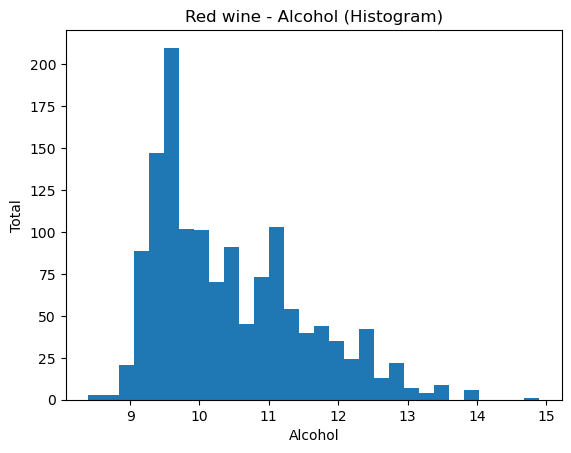

In [56]:
plt.hist(red["alcohol"], bins=30)
plt.title("Red wine - Alcohol (Histogram)")
plt.xlabel("Alcohol")
plt.ylabel("Total")
plt.show()

To examine whether the alcohol feature in red wine is normally distributed, a histogram with 30 bins was plotted.

The histogram shows a distribution that is approximately bell-shaped, with most values concentrated between 9% and 12% alcohol. The highest frequency appears around 9.5–10%.

However, the distribution is not perfectly symmetric. There is a slight right-skewness, as the tail extends towards higher alcohol values (up to approximately 15%). This indicates the presence of a small number of higher alcohol observations.

Although the distribution is not perfectly normal, it can be considered approximately normally distributed due to:

- A single central peak
- Gradual decrease in frequencies on both sides
- No extreme clustering at boundaries

This suggests that alcohol is close to normally distributed, but minor skewness and potential outliers are present.

In contrast, other variables such as residual sugar (especially in white wine) show strong right-skewness, indicating a non-normal distribution.

## 8.Outlier Analysis

#### 8.1 Identification of Outliers Using Boxplots

To examine the presence of outliers, boxplots were created for the feature residual sugar for both red and white wine.

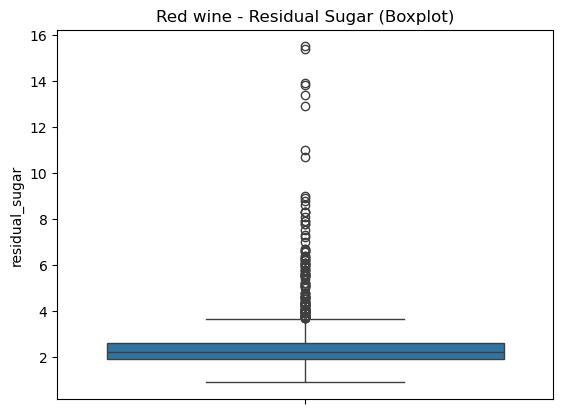

In [28]:
sns.boxplot(y=red["residual_sugar"])
plt.title("Red wine - Residual Sugar (Boxplot)")
plt.show()

### Red Wine – Residual Sugar

The boxplot shows:
- A narrow interquartile range (IQR), meaning most values are concentrated around the median (~2.2).
- A large number of points above the upper whisker.
- Several extreme values reaching up to approximately 16.

This indicates a right-skewed distribution with multiple high-value outliers.

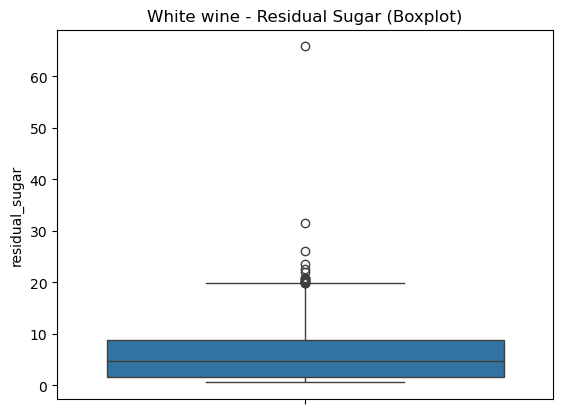

In [29]:
sns.boxplot(y=white["residual_sugar"])
plt.title("White wine - Residual Sugar (Boxplot)")
plt.show()

### White Wine – Residual Sugar

The white wine boxplot shows:
- A wider IQR compared to red wine.
- Several extreme outliers above the upper whisker.
- Very large maximum values, reaching above 60.

This confirms that white wine has more extreme residual sugar values in absolute terms.

## 8.2 Mathematical Identification Using the IQR Method

To formally detect outliers, the Interquartile Range (IQR) method was applied.

The formula used:

IQR=Q3−Q1

Outliers were defined as values outside:
Q1−1.5×IQR and Q3+1.5×IQR

In [30]:
col = "residual_sugar"

Q1 = red[col].quantile(0.25)
Q3 = red[col].quantile(0.75)
IQR = Q3 - Q1

red_clean = red[(red[col] >= Q1 - 1.5*IQR) &
                (red[col] <= Q3 + 1.5*IQR)]

print("Before:", len(red))
print("After:", len(red_clean))

Before: 1359
After: 1233


### Red Wine Results
Before removing outliers:

- 1359 samples

After removing outliers:

- 1233 samples

This means that 126 observations were identified as statistical outliers.

Approximately 9.3% of the red wine dataset was classified as outliers based on residual sugar.

This confirms that red wine contains a relatively high proportion of extreme sugar values compared to its dataset size.

In [31]:
col = "residual_sugar"

Q1 = white[col].quantile(0.25)
Q3 = white[col].quantile(0.75)

white_clean = white[(white[col] >= Q1 - 1.5*(Q3-Q1)) &
                    (white[col] <= Q3 + 1.5*(Q3-Q1))]

print("Before:", len(white))
print("After:", len(white_clean))

Before: 3961
After: 3945


### White Wine Results
Before removing outliers:

- 3961 samples

After removing outliers:

- 3945 samples

This means only 16 observations were removed.

Approximately 0.4% of the white wine dataset was classified as outliers.

Although white wine has very high maximum values, most of the data remains within the expected statistical range.

## 8.3 Interpretation

Even though white wine shows more extreme maximum values, the red wine dataset contains a higher proportion of statistical outliers relative to its size.

Removing outliers:
- Reduces variance
- Improves normality
- Stabilizes further statistical analysis (correlation and regression)

However, extreme sugar values may represent real production variations rather than measurement errors. Therefore, outlier removal should be considered carefully depending on the purpose of the analysis.

## 9. Plot diagrams that visualize the process of exploration.

To explore differences and similarities between red and white wine, several visualizations were created based on the aggregated dataset. These diagrams support the comparative analysis and help answer the research questions related to quality, alcohol content, and residual sugar.

### 9.1 Barplot – Average Quality per Type

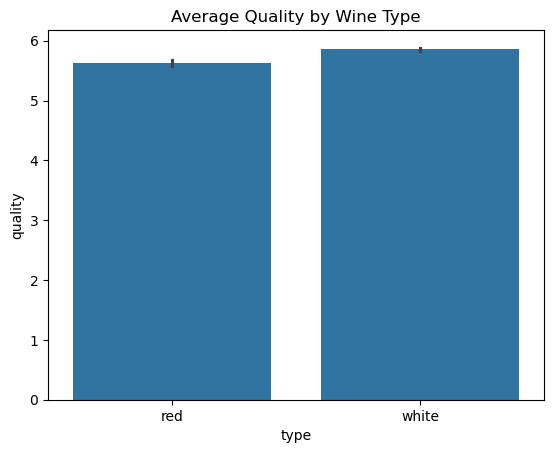

In [32]:
sns.barplot(x="type", y="quality", data=wine)
plt.title("Average Quality by Wine Type")
plt.show()

**b) which type of wine has higher average quality, how big is the difference?:**

The bar chart illustrates the average quality score for red and white wine. White wine shows a slightly higher average quality compared to red wine. However, the difference is relatively small, indicating that both wine types have comparable overall quality levels. This suggests that while a difference exists, it is not substantial.

### 9.2 Barplot – Average Alcohol per Type

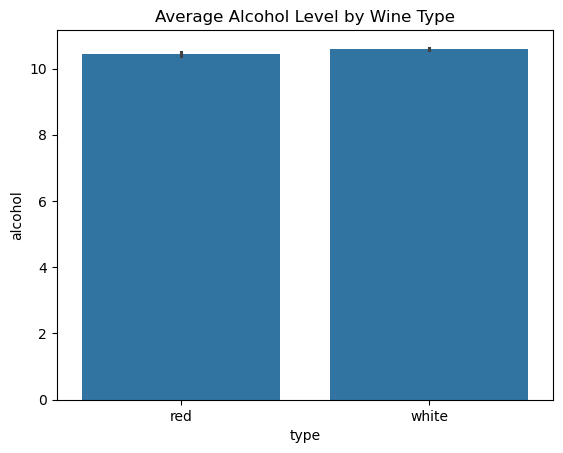

In [33]:
sns.barplot(x="type", y="alcohol", data=wine)
plt.title("Average Alcohol Level by Wine Type")
plt.show()

**c) which type of wine has higher average level of alcohol?**

The second bar chart compares the average alcohol content between red and white wine. White wine appears to have a marginally higher average alcohol level than red wine. The difference is small but consistent, suggesting that white wines in this dataset tend to contain slightly more alcohol on average.

### Barplot – Average Residual Sugar per Type

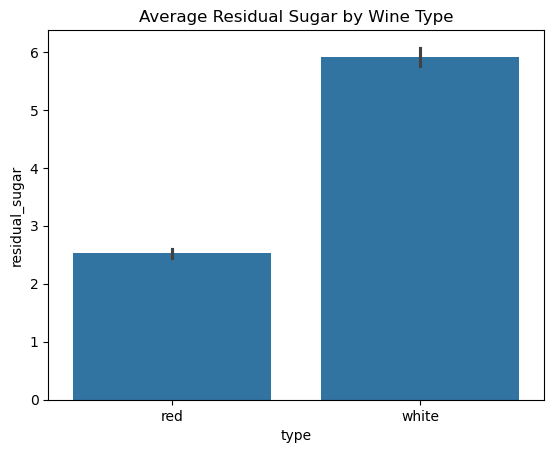

In [34]:
sns.barplot(x="type", y="residual_sugar", data=wine)
plt.title("Average Residual Sugar by Wine Type")
plt.show()

**d) which one has higher average quantity of residual sugar?**

The third bar chart displays the average residual sugar content for both wine types. Here, a clear difference is observed. White wine contains significantly higher levels of residual sugar compared to red wine. This confirms that white wines in the dataset are generally sweeter than red wines.

### 9.4 Boxplot – Quality Distribution

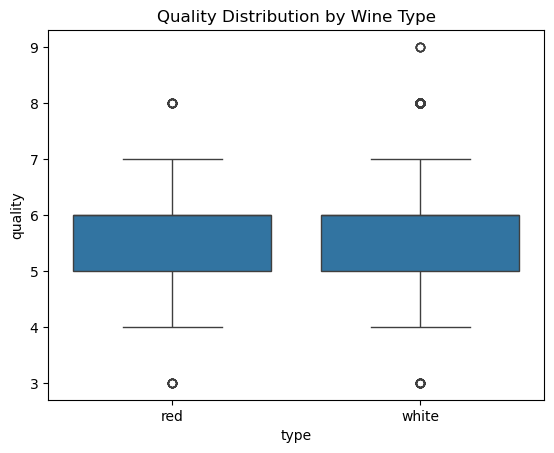

In [35]:
sns.boxplot(x="type", y="quality", data=wine)
plt.title("Quality Distribution by Wine Type")
plt.show()

The boxplot visualizes the distribution of quality scores for red and white wine. Both wine types show similar median values and interquartile ranges, indicating comparable variability in quality. However, white wine appears to have slightly more high-quality outliers (scores of 8 and 9). Overall, the distributions are relatively similar, with only minor differences in spread.

both have:
- Median around 5–6
- placed IQR (box)
- Outliers in both
- White have a bit more high outliers (8–9).

but the spredning is quite similar.

### 9.5 Scatterplot – Alcohol vs Quality

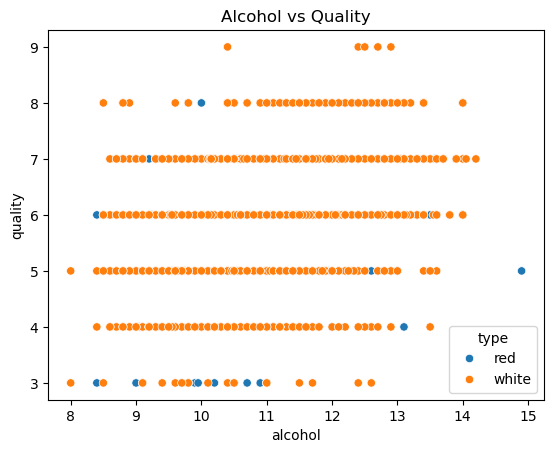

In [36]:
sns.scatterplot(x="alcohol", y="quality", hue="type", data=wine)
plt.title("Alcohol vs Quality")
plt.show()

The scatterplot examining the relationship between alcohol content and quality suggests a weak positive relationship. Wines with higher alcohol content tend to achieve slightly higher quality scores. While the relationship is not strong, there appears to be a tendency for increased alcohol levels to be associated with better quality ratings.(supports H4)

### 9.6 Scatterplot – Residual Sugar vs Quality

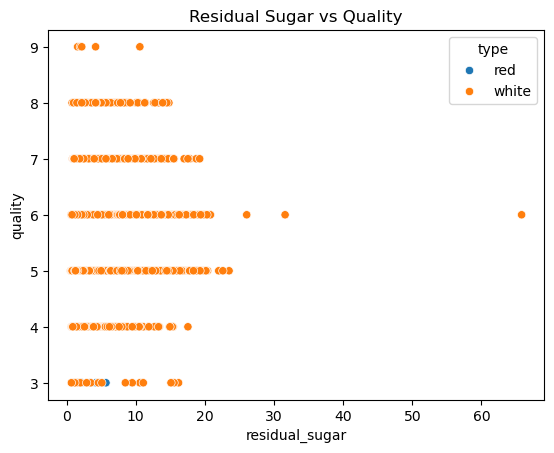

In [37]:
sns.scatterplot(x="residual_sugar", y="quality", hue="type", data=wine)
plt.title("Residual Sugar vs Quality")
plt.show()

**e) do the quantity of alcohol and residual sugar influence the quality of the wine?**

The scatterplot of residual sugar versus quality does not show a clear or strong relationship. Higher residual sugar levels do not consistently correspond to higher quality scores. In particular, white wines exhibit high variability in sugar content without a proportional increase in quality. This suggests that sweetness alone does not determine wine quality. (supports H5)

**Which type has higher average quality?**

In [38]:
wine.groupby("type")["quality"].mean()

type
red      5.623252
white    5.854835
Name: quality, dtype: float64

The average quality score for red wine is 5.62, while white wine has an average score of 5.85. The difference is approximately 0.23 points, indicating that white wine performs slightly better on average, although the difference is relatively small.

## Summary of Findings for Research Questions
- b) White wine has a slightly higher average quality score than red wine, though the difference is small.
- c) White wine also has a marginally higher average alcohol content.
- d) White wine contains significantly higher residual sugar levels than red wine.
- e) Alcohol appears to have a weak positive relationship with wine quality, whereas residual sugar does not show a strong or consistent influence on quality.

# 10 pH Binning

## 10.1 Binning of pH Values

In [39]:
wine["pH_bin_5"] = pd.cut(wine["pH"], bins=5)
wine["pH_bin_5"].value_counts().sort_index()

pH_bin_5
(2.719, 2.978]     253
(2.978, 3.236]    2687
(3.236, 3.494]    2089
(3.494, 3.752]     275
(3.752, 4.01]       16
Name: count, dtype: int64

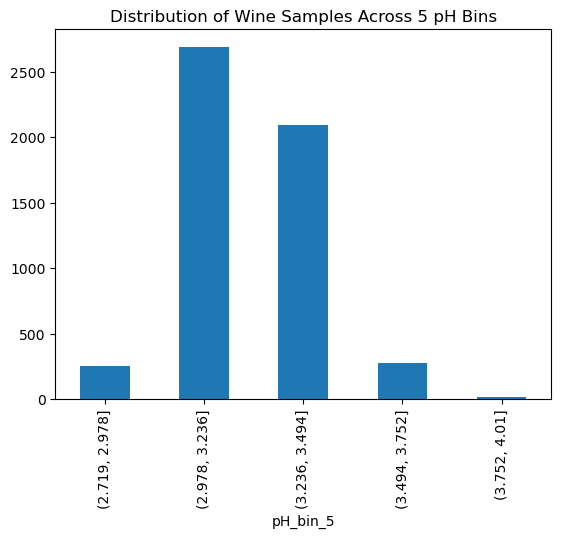

In [40]:
wine["pH_bin_5"].value_counts().sort_index().plot(kind="bar")
plt.title("Distribution of Wine Samples Across 5 pH Bins")
plt.show()


To examine the distribution of pH levels in the aggregated dataset, the pH variable was divided into five equal-width intervals (bins).
The results show that the majority of wine samples fall within the interval:
(2.978, 3.236], which contains 2,687 observations.

The second largest group is:
(3.236, 3.494], with 2,089 observations.

This indicates that most wines in the dataset have a pH value between approximately 3.0 and 3.5, suggesting a strong concentration of acidity levels in this range.

Very few wines are found in the extreme intervals, particularly above pH 3.75, where only 16 observations are recorded. This suggests that extreme pH values are rare within the dataset.

## 10.2 Binning into Ten Subsets

In [41]:
wine["pH_bin_10"] = pd.cut(wine["pH"], bins=10)
wine["pH_bin_10"].value_counts().sort_index()

pH_bin_10
(2.719, 2.849]      14
(2.849, 2.978]     239
(2.978, 3.107]     969
(3.107, 3.236]    1718
(3.236, 3.365]    1403
(3.365, 3.494]     686
(3.494, 3.623]     228
(3.623, 3.752]      47
(3.752, 3.881]      12
(3.881, 4.01]        4
Name: count, dtype: int64

When the pH variable is divided into ten smaller intervals, a more detailed distribution emerges.

The largest concentration of wines is found in:

(3.107, 3.236], containing 1,718 observations,
followed by (3.236, 3.365], with 1,403 observations.

The ten-bin approach provides a more granular view of how wines are distributed across pH levels. It reveals that the highest density is centered more precisely around pH values between approximately 3.1 and 3.3.

However, increasing the number of bins also leads to smaller group sizes in the extreme ranges, which may introduce more variability and less stability in interpretation.

## Conclusion

Dividing the dataset into five bins provides a clear and simplified overview of pH distribution, showing that most wines cluster around mid-range pH values.

Using ten bins offers more detailed insight into the concentration of wines within narrower pH intervals, but it also increases fragmentation and may reduce interpretability in the less populated range

# 11. Which other questions might be of interest for the wine producers, consumers and distributers. 

## Wine Producers
Producers may be interested in identifying optimal ranges of chemical attributes, such as pH or alcohol content, that are associated with higher quality ratings. Further investigation could explore whether there are threshold effects or diminishing returns when increasing certain components. Understanding combinations of chemical factors that consistently appear in higher-quality wines may also support targeted product development.

## Wine Distributors
Distributors may benefit from exploring whether specific chemical profiles correspond to distinct market segments. For example, are sweeter white wines consistently associated with certain quality levels? Can acidity profiles help position wines for particular consumer preferences? Such insights may inform pricing strategies and marketing campaigns.

## Consumers
Consumers may be interested in understanding whether certain measurable characteristics, such as alcohol content or acidity balance, reliably signal higher quality. Additionally, differences in quality patterns between red and white wines may influence purchasing decisions. Identifying common traits among higher-rated wines could help consumers make more informed choices.

# 12. Search for correlation between the normally distributed dependent and independent variables. 

## STEP 1 – make correlation matrix

In [42]:
corr_matrix = wine.corr(numeric_only=True)
corr_matrix

#Det giver en tabel med alle korrelationer.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
volatile_acidity,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
citric_acid,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
residual_sugar,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
chlorides,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
free_sulfur_dioxide,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
total_sulfur_dioxide,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
density,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
sulphates,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884


## STEP 2 – make a heatmap

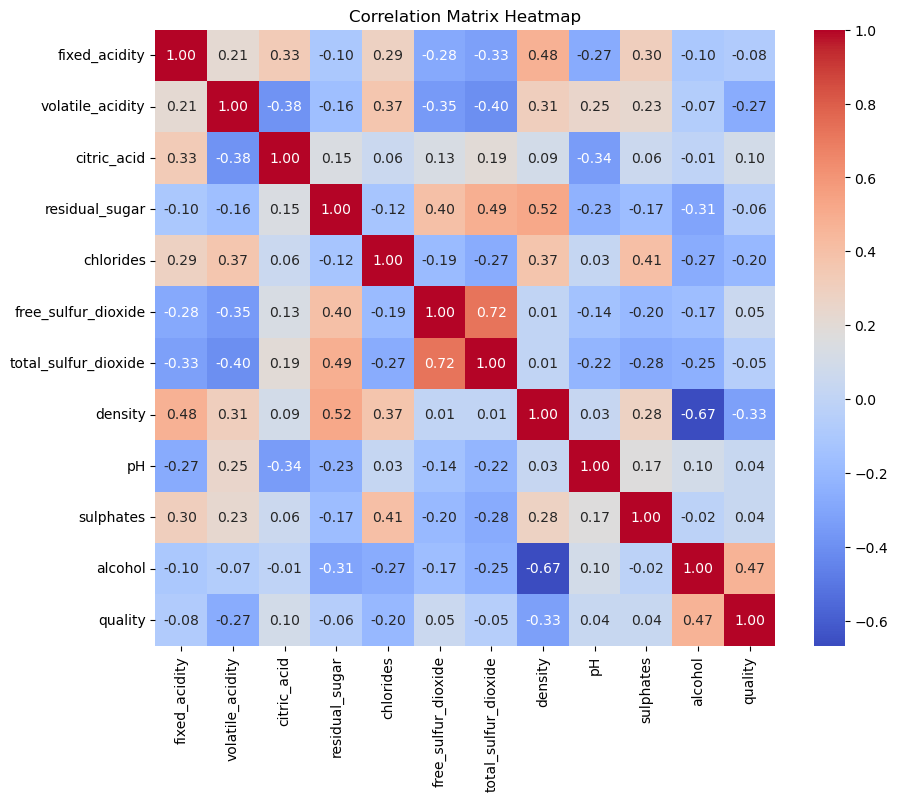

In [43]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## STEP 3 - Find what effects the quality the most

In [44]:
corr_matrix["quality"].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.469422
citric_acid             0.097954
free_sulfur_dioxide     0.054002
sulphates               0.041884
pH                      0.039733
total_sulfur_dioxide   -0.050296
residual_sugar         -0.056830
fixed_acidity          -0.080092
chlorides              -0.202137
volatile_acidity       -0.265205
density                -0.326434
Name: quality, dtype: float64

## Correlation Analysis
The correlation matrix reveals that alcohol has the strongest positive relationship with wine quality (r = 0.47), indicating that wines with higher alcohol content tend to receive higher quality scores.

Density shows the strongest negative correlation with quality (r = -0.33), suggesting that higher density values are associated with lower quality ratings.

Volatile acidity also demonstrates a moderate negative relationship with quality (r = -0.27), implying that increased volatile acidity may reduce perceived wine quality.

On the other hand, variables such as pH (r = 0.04), sulphates (r = 0.04), and free sulfur dioxide (r = 0.05) show very weak correlations with quality, indicating minimal linear influence.

Additionally, strong correlations were observed between certain independent variables. In particular, free sulfur dioxide and total sulfur dioxide show a high positive correlation (r = 0.72), and alcohol is strongly negatively correlated with density (r = -0.67). These relationships suggest potential multicollinearity among some features.

### Connection to Hypothesis H6
These findings directly address Hypothesis H6, which states that some chemical properties have a stronger influence on wine quality than others.

The correlation results clearly show that alcohol has the strongest positive association with quality (r = 0.47), while density (r = -0.33) and volatile acidity (r = -0.27) show notable negative relationships. In contrast, variables such as pH, sulphates, and free sulfur dioxide display only weak correlations.

This confirms that certain chemical properties influence wine quality more strongly than others, thereby supporting H6.

# 13 – Feature removal

To improve interpretability and reduce redundancy, feature selection was performed based on the correlation analysis.

## STEP 1 – Identify a weak correlation with quality.

First, the absolute correlations between each independent variable and the dependent variable (quality) were examined:

In [45]:
quality_corr = corr_matrix["quality"].abs().sort_values()
quality_corr

pH                      0.039733
sulphates               0.041884
total_sulfur_dioxide    0.050296
free_sulfur_dioxide     0.054002
residual_sugar          0.056830
fixed_acidity           0.080092
citric_acid             0.097954
chlorides               0.202137
volatile_acidity        0.265205
density                 0.326434
alcohol                 0.469422
quality                 1.000000
Name: quality, dtype: float64

The absolute correlation values between the independent variables and wine quality were examined. Variables with very weak linear relationships (|r| < 0.10) were identified.

In particular, the following variables showed minimal correlation with quality:

- pH (r = 0.04)
- sulphates (r = 0.04)
- total_sulfur_dioxide (r = 0.05)
- free_sulfur_dioxide (r = 0.05)
- residual_sugar (r = 0.06)
- fixed_acidity (r = 0.08)
- citric_acid (r = 0.10)

Among these, pH and residual_sugar were selected for removal due to their very weak relationship with wine quality.

## Step 2 – Identify multicollinearity between independent variables

The correlation matrix also revealed strong multicollinearity between:

free_sulfur_dioxide and total_sulfur_dioxide (r = 0.72)

Since these two variables measure closely related chemical properties, retaining both would introduce redundancy. Therefore, free_sulfur_dioxide was removed, while total_sulfur_dioxide was retained.

## Step 3 – Decide which variables to remove

Based on the analysis:
- pH was removed due to very weak correlation with quality.
- residual_sugar was removed due to weak correlation with quality.
- free_sulfur_dioxide was removed due to strong multicollinearity with total_sulfur_dioxide.
- Alcohol was retained instead of density because alcohol has a stronger direct relationship with quality.

## Step 4 – Remove the selected features

In [46]:
wine_reduced = wine.drop(columns=[
    "pH",
    "residual_sugar",
    "free_sulfur_dioxide"
])

wine_reduced.head()

,fixed_acidity,volatile_acidity,citric_acid,chlorides,total_sulfur_dioxide,density,sulphates,alcohol,quality,type,quality_level,pH_bin_5,pH_bin_10
0,7.4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5,red,medium,"(3.494, 3.752]","(3.494, 3.623]"
1,7.8,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5,red,medium,"(2.978, 3.236]","(3.107, 3.236]"
2,7.8,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5,red,medium,"(3.236, 3.494]","(3.236, 3.365]"
3,11.2,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6,red,medium,"(2.978, 3.236]","(3.107, 3.236]"
4,7.4,0.66,0.00,0.075,40.0,0.9978,0.56,9.4,5,red,medium,"(3.494, 3.752]","(3.494, 3.623]"


## Step 5 – Final Reduced Feature Set

The reduced dataset excludes:

- pH
- residual_sugar
- free_sulfur_dioxide

This results in a more focused feature set, retaining variables with stronger explanatory power and reducing multicollinearity.

# 14. Data Scaling and Normalization

#### 14.1 Original Distribution of Residual Sugar

In [47]:
col = "residual_sugar"
x = wine[col]

x.describe()

count    5320.000000
mean        5.048477
std         4.500180
min         0.600000
25%         1.800000
50%         2.700000
75%         7.500000
max        65.800000
Name: residual_sugar, dtype: float64

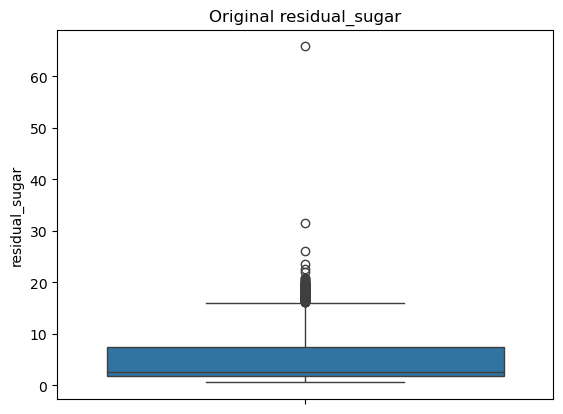

In [48]:
sns.boxplot(y=x)
plt.title("Original residual_sugar")
plt.show()

Before applying scaling techniques, the residual sugar variable was examined in its original form.

Descriptive statistics:
- Count: 5320
- Mean: 5.05
- Standard deviation: 4.50
- Minimum: 0.6
- 25th percentile: 1.8
- Median: 2.7
- 75th percentile: 7.5
- Maximum: 65.8

The boxplot of the original variable shows a strongly right-skewed distribution. Most values are concentrated at the lower end of the scale, while a small number of extreme values extend far to the right (up to 65.8).

The large gap between the 75th percentile (7.5) and the maximum value (65.8) indicates the presence of significant outliers.

#### 14.2 - min-max scaling

In [49]:
x_minmax = (x - x.min()) / (x.max() - x.min())

x_minmax.describe()

count    5320.000000
mean        0.068228
std         0.069021
min         0.000000
25%         0.018405
50%         0.032209
75%         0.105828
max         1.000000
Name: residual_sugar, dtype: float64

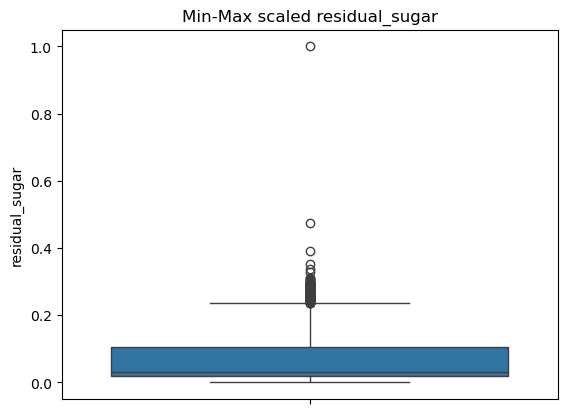

In [50]:
sns.boxplot(y=x_minmax)
plt.title("Min-Max scaled residual_sugar")
plt.show()

Min-Max scaling was applied using the formula:
- (x−min)/(max−min)


After applying Min-Max scaling, the variable was transformed into a range between 0 and 1.

Descriptive statistics after scaling:
- Mean: 0.068
- Standard deviation: 0.069
- Minimum: 0
- Maximum: 1

Although the numerical range changed, the overall distribution pattern remained right-skewed. The boxplot shows that most values are compressed near zero.

This occurs because the extreme maximum value (65.8) stretches the scale. As a result, the majority of observations are forced into a very small interval close to 0.

This demonstrates that Min-Max scaling is highly sensitive to outliers.

#### 14.3 Simple normalization

In [51]:
x_norm = x / x.max()

x_norm.describe()

count    5320.000000
mean        0.076725
std         0.068392
min         0.009119
25%         0.027356
50%         0.041033
75%         0.113982
max         1.000000
Name: residual_sugar, dtype: float64

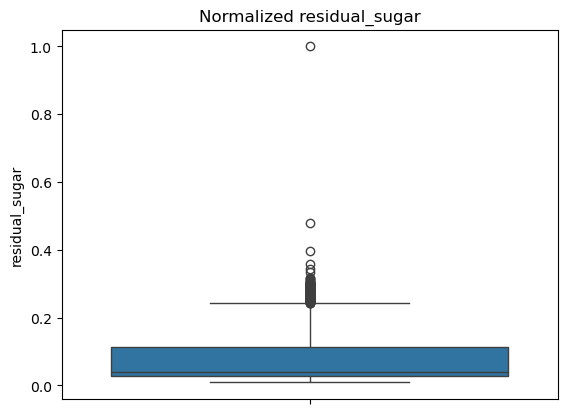

In [52]:
sns.boxplot(y=x_norm)
plt.title("Normalized residual_sugar")
plt.show()

Simple normalization was applied using the formula:
- x/max
    
After normalization:
- Mean: 0.077
- Standard deviation: 0.068
- Minimum: 0.009
- Maximum: 1

The resulting distribution is very similar to the Min-Max scaled version. The extreme maximum value still determines the upper boundary of the scale.

As with Min-Max scaling, the distribution remains right-skewed, and the majority of values are concentrated near zero.


## 14.4 Interpretation and Comparison

Both Min-Max scaling and simple normalization successfully rescale the data into a smaller numerical range. However, neither method removes skewness nor reduces the influence of outliers.

Because residual sugar contains extreme values, scaling methods that depend on the maximum value cause most of the data to become compressed near zero.

This confirms that Min-Max scaling and simple normalization are sensitive to outliers. For skewed variables such as residual sugar, more robust scaling techniques (e.g., RobustScaler) may be more appropriate.

# 15 - Statistical Testing for hypotheses

To evaluate the proposed hypotheses, independent sample t-tests were applied for group comparisons. A significance level of α = 0.05 was used.

For directional hypotheses (where one group was expected to be higher than the other), one-tailed tests were applied. Welch’s t-test was used to account for unequal variances.

## 15.1 H1 – Residual Sugar Difference

In [53]:
t, p = stats.ttest_ind(white["residual_sugar"],
                       red["residual_sugar"],
                       equal_var=False)

p = p / 2

print("P-value:", p)

if p < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

P-value: 6.448042473933796e-301
Reject H0


### Research Hypothesis (H1):
White wine has a higher mean residual sugar than red wine.

### Null Hypothesis (H0):
There is no difference in mean residual sugar between white and red wine.

An independent sample t-test was performed.

Result:

P-value = 6.45 × 10⁻³⁰¹

Since the p-value is far below the significance level of 0.05, we reject the null hypothesis.

### Conclusion:
There is a statistically significant difference in residual sugar between white and red wine. White wine has a significantly higher mean residual sugar.

This strongly supports H1.

## 15.2 H2 – Alcohol Content Difference

In [54]:
t, p = stats.ttest_ind(white["alcohol"],
                       red["alcohol"],
                       equal_var=False)

print("P-value:", p)

if p < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

P-value: 8.238913500548642e-06
Reject H0


### Research Hypothesis (H2):
The mean alcohol content differs between red and white wine.

### Null Hypothesis (H0):
There is no difference in mean alcohol content between red and white wine.

An independent sample t-test was conducted.

Result:

P-value = 8.24 × 10⁻⁶

Since the p-value is below 0.05, we reject the null hypothesis.

### Conclusion:
There is a statistically significant difference in alcohol content between red and white wine. White wine has a slightly higher average alcohol content.

Although the difference is statistically significant, the numerical difference between the two means is relatively small.

## 15.3 H3 – Volatile Acidity Difference

In [55]:
t, p = stats.ttest_ind(red["volatile_acidity"],
                       white["volatile_acidity"],
                       equal_var=False)

p = p / 2

print("P-value:", p)

if p < 0.05:
    print("Reject H0")
else:
    print("Fail to reject H0")

P-value: 3.4529801153e-313
Reject H0


### Research Hypothesis (H3):
Red wine has a higher mean volatile acidity than white wine.

### Null Hypothesis (H0):
There is no difference in mean volatile acidity between red and white wine.

An independent sample t-test was applied.

Result:

P-value = 3.45 × 10⁻³¹³

Since the p-value is far below 0.05, we reject the null hypothesis.

### Conclusion:
Red wine has significantly higher volatile acidity than white wine.

# 16. Summary and Reflection

This project investigated the relationship between physicochemical properties and wine quality using statistical analysis and data visualization.

The results show clear structural differences between red and white wine, particularly in residual sugar, alcohol content, and volatile acidity. White wine contains significantly higher residual sugar, while red wine has higher volatile acidity.

Hypothesis testing confirmed statistically significant differences between the two wine types. Correlation analysis revealed that alcohol has the strongest positive relationship with wine quality (r = 0.47), while density and volatile acidity show moderate negative relationships. Residual sugar showed only a weak association with quality, indicating that sweetness alone does not determine perceived quality.

Outlier analysis and scaling demonstrated that preprocessing methods affect numerical representation but do not fundamentally change the main relationships in the data.

Overall, the findings suggest that wine quality depends on multiple chemical factors rather than a single variable. From a business perspective, alcohol content appears to be an important measurable indicator that may influence production strategies, positioning, and pricing decisions.